# Naive Bayes Algorithm

## 1. Introduction to Naive Bayes

- Collection of __classification__ algorithms based on __Bayes Theorem__.
- Classifies given different __instances (object/data)__ into __predefined classes(groups)__, assuming there is no interdependency of features __(class conditional independence)__.

Just before exploring NB in details, let’s understand __few basic concepts__ first:
1. Conditional Probability
2. Bayes Rule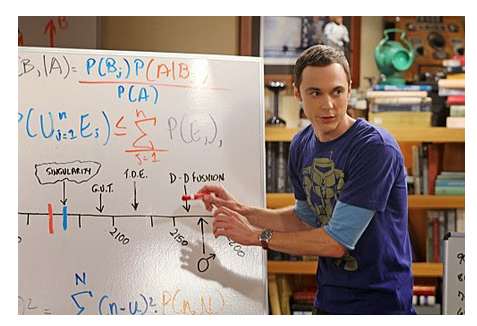


### 1.1  Conditional Probability
> This gives us the chance that something will happen given that something else has already happened.

Let’s say, there is an __outcome ‘B’__ and some __evidence ‘A’__ of that _outcome_. From the way these probabilities are defined:<br> The __probability of having both the outcome ‘B’ and the evidence ‘A’ is:__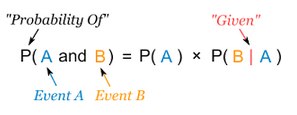


### 1.2. Bayes Rule
Conceptually, this is the way to go from __P(Evidence|known Outcome)__ to __P(Outcome|known Evidence)__.<br>
Often, we know how frequently some particular __evidence is _observed_, given a known outcome__.<br> 
We have to use this known fact to __compute the reverse__, i.e. _to compute the chance of that outcome happening given the evidence._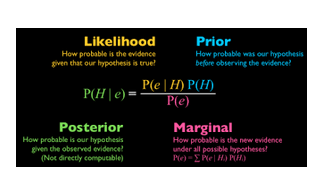


#### Example:
Consider a __population__ where a __disease D has broken out__. The municipality in order to __test the disease uses a machine which gives a _positive output with some probability_ given the person has disease__.<br>
 
 __Probability of disease D given test-positive__ = 
 [P( Test is +ve | disease ) * P ( disease )] / P (+ve test, with or without disease)

### Problem Statement

It is important that credit card companies are able to recognize __fraudulent credit card transactions__ so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in _September 2013_ by __European cardholders__.  

It contains only __numerical input variables which are the result of a PCA transformation__. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA.<br>
- The only features which have _not been transformed with PCA_ are __'Time' and 'Amount'__. 
- Feature __'Time'__ contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature __'Amount'__ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
- Feature __'Class'__ is the response variable and it takes value __1 in case of fraud and 0 otherwise__.

### Inspiration
Identify __fraudulent credit card transactions__.

## Libraries to be imported


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [92]:
data=pd.read_csv("https://raw.githubusercontent.com/amity1415/eKeeda/main/Rawdata/credit_card_fraus.csv")

In [93]:
pd.set_option('display.max_columns',None)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,-0.222998,0.766066,-1.272513,0.851410,0.700597,-0.129634,-0.007757,0.318991,-0.016074,-0.070415,0.027511,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,1.093548,1.168600,1.527660,1.213055,1.239290,0.975573,0.882057,0.966392,0.794259,0.808373,0.589994,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,-0.688422,-0.063689,-2.368115,-0.017984,0.080400,-0.709531,-0.495536,-0.180029,-0.450302,-0.552134,-0.149981,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,-0.340720,0.746752,-1.621015,0.919134,0.899792,-0.010078,0.066086,0.297423,0.025225,-0.077208,-0.021415,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,0.174295,1.576540,0.082667,1.768889,1.499211,0.533501,0.547399,0.782865,0.459390,0.442908,0.156534,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [96]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [97]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [98]:
data.shape

(10000, 31)

### Visualization

Class as pie chart


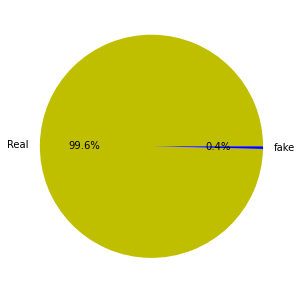

In [99]:
print('Class as pie chart')
fig,ax=plt.subplots(1,1,figsize=(5,6))
ax.pie(data.Class.value_counts(),autopct='%1.1f%%',labels=['Real','fake'],colors=['y','b'])
plt.show()

Time variations


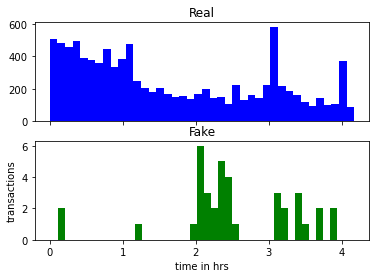

In [100]:
print('Time variations')
data['Time_hr']=data['Time']/3600
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(6,4))
ax1.hist(data.Time_hr[data.Class==0],bins=40,color='b')
ax1.set_title("Real")


ax2.hist(data.Time_hr[data.Class==1],bins=40,color='g')
ax2.set_title("Fake")

plt.xlabel("time in hrs")
plt.ylabel("transactions")
plt.show()


Amount variations


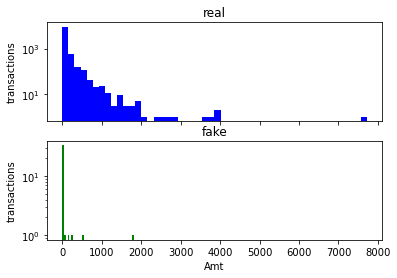

In [101]:
print('Amount variations')
# data['Time_hr']=data['Time']/3600
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(6,4))
ax1.hist(data.Amount[data.Class==0],bins=50,color='b')
ax1.set_title("real")
ax1.set_yscale('log')
ax1.set_ylabel("transactions")
ax2.hist(data.Amount[data.Class==1],bins=40,color='g')
ax2.set_title("fake")
ax2.set_yscale('log')
plt.xlabel("Amt")
plt.ylabel("transactions")
plt.show()

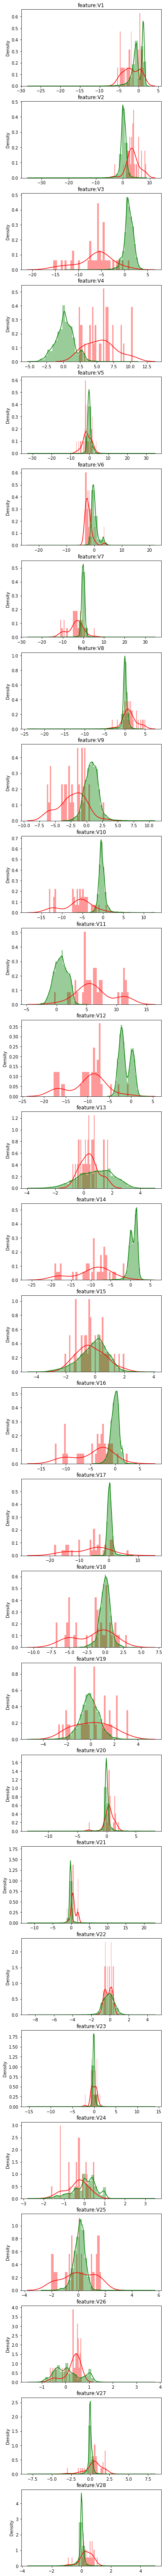

In [102]:
import matplotlib.gridspec as gridspec
gs=gridspec.GridSpec(28,1)
plt.figure(figsize=(6,28*4))

for i,col in enumerate(data[data.iloc[:,1:29].columns]):
#     print(i,gs[i])
    ax=plt.subplot(gs[i])
    sns.distplot(data[col][data.Class==1],bins=40,color='r')
    sns.distplot(data[col][data.Class==0],bins=40,color='g')
    ax.set_xlabel('')
    ax.set_title('feature:'+str(col))
plt.show()
    

## splitting the data

In [103]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [104]:
def split(data,drop_list):
    data=data.drop(drop_list,axis=1)
    print(data.columns)
    from sklearn.model_selection import train_test_split
    y=data.Class.values
    X=data.drop(['Class'],axis=1)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
    print("train size:",len(y_train),'\n test size:',len(y_test))
    print("fraud cases in tes_set:",sum(y_test))
    return X_train,X_test,y_train,y_test

In [105]:
def prdictions(clf,X_train,y_train,X_test):
    clf=clf
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)
    train_pred=clf.predict(X_train)
    print("train set confusion matrix:\n",confusion_matrix(y_train,train_pred))
    return y_pred,y_pred_prob

In [106]:
def scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [107]:
drop_list=[]
X_train, X_test, y_train, y_test = split(data, drop_list)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_hr'],
      dtype='object')
train size: 8000 
 test size: 2000
fraud cases in tes_set: 7


## Gaussian Clf

In [108]:
y_pred, y_pred_prob = prdictions(GaussianNB(), X_train, y_train, X_test)
y_pred_prob.mean()

train set confusion matrix:
 [[7891   78]
 [   0   31]]


0.5

In [109]:
scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1980   13]
 [   1    6]]
recall score:  0.8571428571428571
precision score:  0.3157894736842105
f1 score:  0.46153846153846156
accuracy score:  0.993
ROC AUC: 0.9892480825747259


## Bernoulli clf

In [110]:
y_pred, y_pred_prob = prdictions(BernoulliNB(), X_train, y_train, X_test)
y_pred_prob.mean()

train set confusion matrix:
 [[7967    2]
 [   3   28]]


0.5

In [111]:
scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1992    1]
 [   3    4]]
recall score:  0.5714285714285714
precision score:  0.8
f1 score:  0.6666666666666666
accuracy score:  0.998
ROC AUC: 0.9734786036843237


## RoC curve

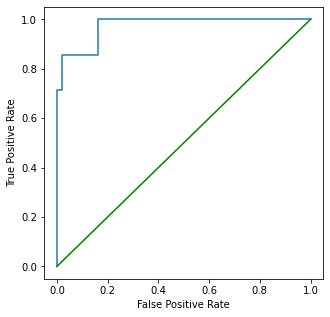

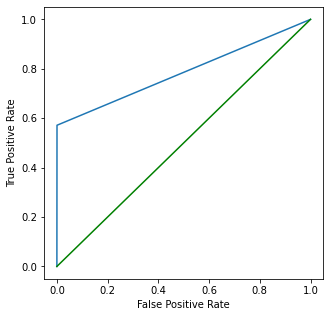

In [112]:
from sklearn.metrics import roc_curve,RocCurveDisplay
def plot(y_test,y_pred):
    fpr,tpr,_=roc_curve(y_test,y_pred)
    roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0,1],[0,1],color='g'),
plot(y_test,y_pred_prob[:,1])
plot(y_test,y_pred)
    
    


In [113]:
print("roc score :",roc_auc_score(y_test,y_pred_prob[:,1]))
print("roc score :",roc_auc_score(y_test,y_pred))

roc score : 0.9734786036843237
roc score : 0.7854634076410293
